<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>P8 Building Customer Segmentation Models using Python</font></h2>

<div style="border-radius:10px; padding: 10px; background-color: #C1FDBC; font-size:120%; text-align:left">
<h4 align="left"><font color=black>Full Name:Bhuvaneswari.R</font></h4>
<h4 align="left"><font color=black>Internship Registraion ID:STU65bb84ee6fec41706788078 </font></h4>

<img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/image.png?raw=true" width="2400">

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Problem:</font></h2>


In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups. Building upon this, we intend to develop a __recommendation system__ that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries) 
    - [Step 1.2 | Loading the Dataset](#load_dataset)
* [Step 2 | Initial Data Analysis](#initial_analysis) 
    - [Step 2.1 | Dataset Overview](#overview) 
    - [Step 2.2 | Summary Statistics](#statistics) 
* [Step 3 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Handling Duplicates](#duplicates)
    - [Step 3.3 | Treating Cancelled Transactions](#InvoiceNo_cleaning)
    - [Step 3.4 | Correcting StockCode Anomalies](#StockCode_cleaning)
    - [Step 3.5 | Cleaning Description Column](#Description_cleaning)
    - [Step 3.6 | Treating Zero Unit Prices](#UnitPrice_cleaning)
    - [Step 3.7 | Outlier Treatment](#outlier_cleaning)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.


<h2 align="left"><font color=#ff6200>Let's get started:</font></h2>

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
%matplotlib inline

In [2]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [4]:
df = pd.read_csv('customer_data_internship.csv', encoding="ISO-8859-1")

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Afterward, we are going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

<a id="overview"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First we will perform a preliminary analysis to understand the structure and types of data columns:

In [5]:
df.head(20)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1     536365     71053                  WHITE METAL LANTERN       6.0   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES       2.0   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER       6.0   
7     536366     22633               HAND WARMER UNION JACK       6.0   
8     536366     22632            HAND WARMER RED POLKA DOT       6.0   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT      32.0   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM        6.0   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN       6.0   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL       8.0   
13    536367     22310              IVORY KNITTED MUG COSY        6.0   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS       6.0   
15    536367     22623        BOX OF VINTAGE JIGSAW BLOCKS        3.0   
16    536367     22622       BOX OF VINTAGE ALPHABET BLOCKS       2.0   
17    536367     21754             HOME BUILDING BLOCK WORD       3.0   
18    536367     21755             LOVE BUILDING BLOCK WORD       3.0   
19    536367     21777          RECIPE BOX WITH METAL HEART       4.0   

       InvoiceDate  UnitPrice  CustomerID         Country  
0   12/1/2010 8:26       2.55     17850.0  United Kingdom  
1   12/1/2010 8:26       3.39     17850.0  United Kingdom  
2   12/1/2010 8:26       2.75     17850.0  United Kingdom  
3   12/1/2010 8:26       3.39     17850.0  United Kingdom  
4   12/1/2010 8:26       3.39     17850.0  United Kingdom  
5   12/1/2010 8:26       7.65     17850.0  United Kingdom  
6   12/1/2010 8:26       4.25     17850.0  United Kingdom  
7   12/1/2010 8:28       1.85     17850.0  United Kingdom  
8   12/1/2010 8:28       1.85     17850.0  United Kingdom  
9   12/1/2010 8:34       1.69     13047.0  United Kingdom  
10  12/1/2010 8:34       2.10     13047.0  United Kingdom  
11  12/1/2010 8:34       2.10     13047.0  United Kingdom  
12  12/1/2010 8:34       3.75     13047.0  United Kingdom  
13  12/1/2010 8:34       1.65     13047.0  United Kingdom  
14  12/1/2010 8:34       4.25     13047.0  United Kingdom  
15  12/1/2010 8:34       4.95     13047.0  United Kingdom  
16  12/1/2010 8:34       9.95     13047.0  United Kingdom  
17  12/1/2010 8:34       5.95     13047.0  United Kingdom  
18  12/1/2010 8:34       5.95     13047.0  United Kingdom  
19  12/1/2010 8:34       7.95     13047.0  United Kingdom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371618 entries, 0 to 371617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    371618 non-null  object 
 1   StockCode    371617 non-null  object 
 2   Description  370357 non-null  object 
 3   Quantity     371617 non-null  float64
 4   InvoiceDate  371617 non-null  object 
 5   UnitPrice    371617 non-null  float64
 6   CustomerID   273561 non-null  float64
 7   Country      371617 non-null  object 
dtypes: float64(3), object(5)
memory usage: 22.7+ MB


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
    
Write your inferences here :
1.Variables: A customer segmentation dataset usually contains various variables or features that describe customers. These may include demographic information such as age, gender, income, occupation, geographic location, etc. It may also include behavioral data such as purchasing history, frequency of purchases, average transaction value, engagement with marketing campaigns, etc.

2.Segmentation Criteria: The dataset may be used to segment customers into different groups based on certain criteria. These criteria could be predefined segments (e.g., high-value customers, loyal customers, new customers) or identified through clustering techniques based on similarities in customer behavior or characteristics.

3.Descriptive Statistics: Initial analysis typically involves calculating descriptive statistics for each variable, such as mean, median, mode, standard deviation, etc. This helps in understanding the central tendency and variability of the data.

4.Visualization: Visualization techniques such as histograms, box plots, scatter plots, and heatmaps can help in identifying patterns and relationships within the data. For example, scatter plots can be used to visualize the relationship between two continuous variables, while box plots can show the distribution of a variable across different segments.

5.Segment Profiling: Once segments are identified, they can be profiled based on their characteristics and behaviors. This involves comparing the average values of different variables across segments to understand what distinguishes one segment from another.

6.Predictive Modeling: Customer segmentation datasets are often used as inputs for predictive modeling techniques such as classification or regression. For example, classification models can be used to predict which segment a new customer is likely to belong to based on their characteristics, while regression models can be used to predict customer lifetime value or likelihood of churn.

<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, we are going to generate summary statistics to gain initial insights into the data distribution:

In [7]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%      50%  \
Quantity    371617.0      9.807250   181.205513 -74215.00      1.00      3.0   
UnitPrice   371617.0      4.779653   106.851629 -11062.06      1.25      2.1   
CustomerID  273561.0  15279.097338  1718.236426  12346.00  13871.00  15150.0   

                 75%      max  
Quantity       10.00  74215.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [8]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    371618  18806                              558475     705
StockCode    371617   3890                              85123A    1817
Description  370357   3948  WHITE HANGING HEART T-LIGHT HOLDER    1864
InvoiceDate  371617  16994                     6/29/2011 15:58     705
Country      371617     37                      United Kingdom  339077

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>

Write your inferences here :
1.Central Tendency: Summary statistics like mean, median, and mode provide information about the central tendency of the variables. The mean gives the average value, while the median represents the middle value when the data is arranged in ascending order. The mode is the most frequently occurring value. These measures help understand where the data clusters around.

2.Variability: Measures like standard deviation, variance, and range indicate the spread or variability of the data points. A higher standard deviation or variance suggests greater dispersion from the mean, indicating more variability in the dataset. Range provides a simple measure of the spread by showing the difference between the maximum and minimum values.

3.Distribution: Skewness and kurtosis provide insights into the shape of the distribution. Skewness indicates asymmetry in the distribution, with positive skewness meaning a longer tail on the right side and negative skewness indicating a longer tail on the left side. Kurtosis measures the peakedness of the distribution; higher kurtosis indicates a more peaked distribution.

4.Outliers: Summary statistics can also highlight potential outliers in the data. Outliers are data points that significantly deviate from the rest of the dataset and may skew summary statistics such as the mean. Observing the maximum and minimum values, as well as examining box plots or histograms, can help identify outliers.

5.Missing Values: Summary statistics often include counts of missing values for each variable. Understanding the extent of missing data is crucial for data cleaning and imputation strategies.

6.Correlation: Summary statistics may include correlation coefficients between variables. Correlation measures the strength and direction of the linear relationship between two variables. Positive correlation indicates that as one variable increases, the other also tends to increase, while negative correlation indicates an inverse relationship.

<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Initially, we will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

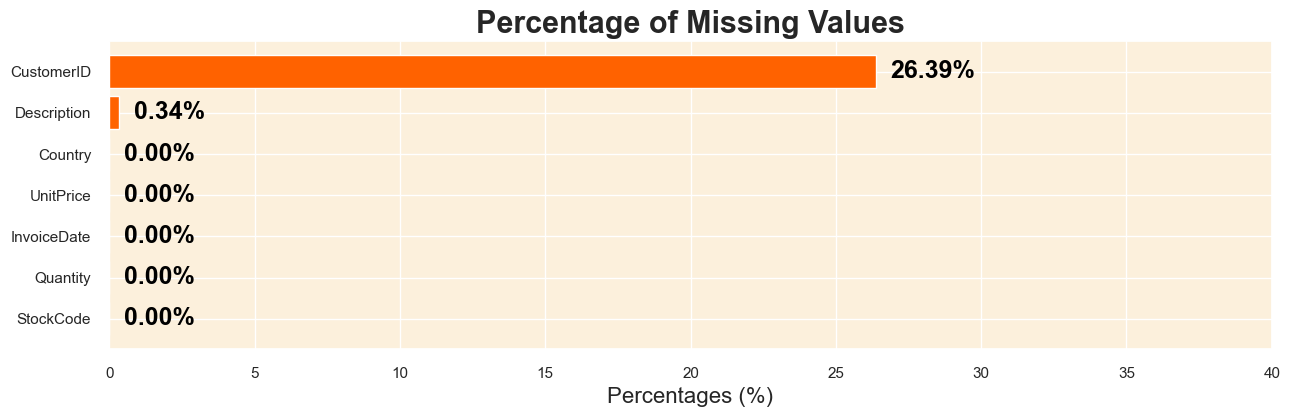

In [9]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100
# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Missing Values Strategy:</font></h3>

- __`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.


In [10]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
missing_values_rows = df[df['CustomerID'].isnull() | df['Description'].isnull()]

In [11]:
# Display the extracted rows
print(missing_values_rows)

       InvoiceNo StockCode                         Description  Quantity  \
622       536414     22139                                 NaN      56.0   
1443      536544     21773     DECORATIVE ROSE BATHROOM BOTTLE       1.0   
1444      536544     21774     DECORATIVE CATS BATHROOM BOTTLE       2.0   
1445      536544     21786                  POLKADOT RAIN HAT        4.0   
1446      536544     21787               RAIN PONCHO RETROSPOT       2.0   
...          ...       ...                                 ...       ...   
370927    569202     22495      SET OF 2 ROUND TINS CAMEMBERT        1.0   
370928    569202     22539              MINI JIGSAW DOLLY GIRL       2.0   
370929    569202     22540          MINI JIGSAW CIRCUS PARADE        2.0   
370930    569202     22805  BLUE DRAWER KNOB ACRYLIC EDWARDIAN      10.0   
371617    569222       NaN                                 NaN       NaN   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:5

In [12]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [13]:
df.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
358420    568146     23207           LUNCH BAG ALPHABET DESIGN      10.0   
4978      536833     22578  WOODEN STAR CHRISTMAS SCANDINAVIAN      12.0   
289803    562290     23200                     JUMBO BAG PEARS      10.0   
176651   C552012     23183        MOTHER'S KITCHEN SPOON REST       -6.0   
121120    546737     22617          BAKING SET SPACEBOY DESIGN       3.0   
312568    564356     22661     CHARLOTTE BAG DOLLY GIRL DESIGN       3.0   
270545    560571    84279P    CHERRY BLOSSOM  DECORATIVE FLASK       4.0   
214038   C555563    15060B          FAIRY CAKE DESIGN UMBRELLA      -1.0   
24223     538346     21165       BEWARE OF THE CAT METAL SIGN       12.0   
249118    558885     22178     VICTORIAN GLASS HANGING T-LIGHT      24.0   

             InvoiceDate  UnitPrice  CustomerID         Country  
358420   9/25/2011 11:33       1.65     16169.0  United Kingdom  
4978     12/2/2010 17:48       0.85     18239.0  United Kingdom  
289803    8/4/2011 11:16       2.08     14825.0  United Kingdom  
176651    5/5/2011 17:29       3.75     13552.0  United Kingdom  
121120   3/16/2011 11:52       4.95     13358.0  United Kingdom  
312568   8/24/2011 15:47       0.85     13969.0  United Kingdom  
270545   7/19/2011 14:29       3.75     17735.0  United Kingdom  
214038    6/5/2011 14:48       3.75     17841.0  United Kingdom  
24223   12/10/2010 14:53       1.69     17865.0  United Kingdom  
249118    7/4/2011 15:10       1.25     13267.0  United Kingdom

In [14]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Handling Duplicates</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, we are going to recognize duplicate rows in the dataset:

In [15]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG       1.0   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG       1.0   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE       1.0   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE       1.0   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN       1.0   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN       1.0   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON        1.0   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON        1.0   
578    536412     21448         12 DAISY PEGS IN WOOD BOX       1.0   
598    536412     21448         12 DAISY PEGS IN WOOD BOX       1.0   

         InvoiceDate  UnitPrice  CustomerID         Country  
494  12/1/2010 11:45       1.25     17908.0  United Kingdom  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
521  12/1/2010 11:45       2.95     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
578  12/1/2010 11:49       1.65     17920.0  United Kingdom  
598  12/1/2010 11:49       1.65     17920.0  United Kingdom

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Duplicates Strategy:</font></h3>
    
In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system. 

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [16]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 2826 duplicate rows that need to be removed.


In [17]:
# Getting the number of rows in the dataframe
df.shape[0]

270735

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Treating Cancelled Transactions</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the `InvoiceNo` starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [18]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
'''
C14245345  Cancelled
35365563   Completed
'''
# Analyze the characteristics of these rows (considering the new column)
print("Transaction Status Analysis:")
print("Total number of transactions:", len(df))
print("Number of completed transactions:", df['Transaction_Status'].value_counts()['Completed'])
print("Number of cancelled transactions:", df['Transaction_Status'].value_counts()['Cancelled'])

Transaction Status Analysis:
Total number of transactions: 270735
Number of completed transactions: 264401
Number of cancelled transactions: 6334


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Cancelled Transactions Data:</font></h3>

Write your inferences here :
1.Frequency of Cancelled Transactions: We can examine the total number and proportion of cancelled transactions compared to completed ones to understand the scale of cancellations.

2.Customer Analysis: We can analyze if certain customers tend to have a higher proportion of cancelled transactions. This could indicate potential issues with customer satisfaction or specific customer behaviors leading to cancellations.

3.Product Analysis: We can identify if there are particular products that have a higher likelihood of being associated with cancelled transactions. This might suggest issues with product quality, description clarity, or stock availability.

4.Time Analysis: Analyzing the timing of cancelled transactions can reveal patterns such as certain times of the day, days of the week, or months when cancellations are more frequent. This information could be useful for managing inventory or staffing levels.

5.Association Analysis: We can investigate if there are associations between products frequently purchased together in cancelled transactions. This might uncover cases where customers tend to cancel entire sets of products rather than individual items.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy for Handling Cancelled Transactions:</font></h3>
    
Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

- Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
    
    
- Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.



In [19]:
# Filter out the cancelled transactions
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

In [20]:
# Finding the percentage of cancelled transactions
cancelled_percentage = cancelled_transactions.shape[0] / df.shape[0] * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.34%


<a id="StockCode_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.4 |</span><span style='color:#ff6200'> Correcting StockCode Anomalies</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [21]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3530


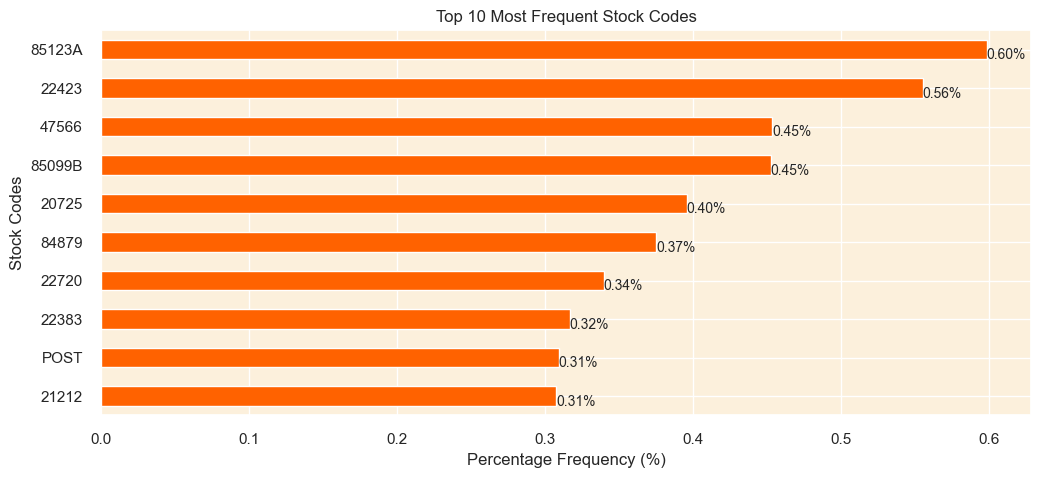

In [22]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100
# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on Stock Codes:</font></h3>

Write your inferences here :
1.Product Identification: The stock code could represent a unique identifier for products in the dataset. In this case, analyzing the stock code may provide insights into the diversity of products offered, their categorization, and popularity.

2.Inventory Management: The stock code might be associated with inventory management, tracking stock levels, and replenishment. Analyzing trends in stock codes could reveal patterns in inventory turnover, stockouts, or overstock situations.

3.Supplier Identification: The stock code could also indicate the supplier or manufacturer of the product. Analyzing stock codes may help identify key suppliers, assess supplier performance, and manage supplier relationships.

4.Sales and Revenue Analysis: Understanding the relationship between stock codes and sales/revenue can provide insights into the performance of different product categories or suppliers. Analyzing sales trends by stock code may help identify top-selling products and revenue contributors.

5.Association with Customer Behavior: Examining stock codes in conjunction with customer behavior data can uncover patterns in purchasing preferences, cross-selling opportunities, and customer segmentation based on product preferences.

6.Quality Control and Product Variants: Stock codes might differentiate between different variants of the same product or indicate variations in quality, size, color, etc. Analyzing stock codes can help monitor product quality, assess the popularity of different variants, and optimize product offerings.

7.Supply Chain Optimization: Analyzing stock codes in the context of the supply chain can help optimize inventory management, streamline procurement processes, and improve supply chain efficiency.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [23]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3522
0       7
1       1
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:

Write your inferences here :
1.Product Diversity: If there are a large number of unique stock codes, it suggests a diverse range of products within the dataset. This could indicate a broad product offering or a variety of items being sold.

2.Popular Products: Stock codes associated with a high frequency of transactions or sales may represent popular products. Analyzing these codes further could reveal top-selling items or product categories driving revenue.

3.Supplier Performance: If stock codes are linked to specific suppliers or manufacturers, analyzing sales data by stock code could provide insights into the performance of different suppliers. Identifying stock codes associated with high sales volume can help assess supplier effectiveness.

4.Inventory Management: Patterns in stock code usage over time can inform inventory management strategies. For example, frequent stock code usage might indicate fast-moving items requiring closer monitoring of stock levels.

5.Seasonal Trends: Changes in stock code usage over different time periods could indicate seasonal trends or shifts in consumer preferences. Analyzing these patterns can help businesses prepare for seasonal fluctuations in demand.

6.Product Associations: Analyzing co-occurrences of stock codes in transactions can reveal associations between products frequently purchased together. This information can be leveraged for cross-selling or bundling strategies.

7.Quality Control: If stock codes represent different variants or qualities of the same product, analyzing sales data by stock code can help identify trends in product preferences and quality perception among customers.

8.Supply Chain Efficiency: Monitoring stock code usage along the supply chain can help optimize procurement processes, minimize stockouts, and improve supply chain efficiency.

In [24]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
for stock_code in df['StockCode']:
    print(stock_code)

85123A
71053
84406B
84029G
84029E
22752
21730
22633
22632
84879
22745
22748
22749
22310
84969
22623
22622
21754
21755
21777
48187
22960
22913
22912
22914
21756
22728
22727
22726
21724
21883
10002
21791
21035
22326
22629
22659
22631
22661
21731
22900
21913
22540
22544
22492
POST
22086
22632
22633
85123A
71053
84406B
20679
37370
21871
21071
21068
82483
82486
82482
82494L
84029G
84029E
22752
21730
21258
85123A
71053
84406B
20679
37370
21871
21071
21068
82483
82486
82482
82494L
84029G
84029E
22752
21730
22114
21733
22632
22633
22386
85099C
21033
20723
84997B
84997C
21094
20725
21559
22352
21212
21975
21977
84991
84519A
85183B
85071B
21931
21929
22961
22139
84854
22411
82567
21672
22774
22771
71270
22262
22637
21934
21169
21166
21175
37444A
37444C
22086
22083
84971S
71270
47580
22261
84832
22644
21533
21557
15056BL
15056N
22646
22176
22438
21731
22778
22719
21523
D
10002
21912
21832
22411
22379
22381
22798
22726
22926
22839
22838
22783
35004C
82484
84755
22464
21324
22457
22469
22470
22224


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's calculate the percentage of records with these anomalous stock codes:    

In [25]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.50%


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Inference: 1.Missing or Invalid Stock Codes: Anomalous stock codes could refer to missing or invalid codes that do not conform to the expected format or list of known codes. These could be due to data entry errors, system issues, or inconsistencies in data sources.

2.Out-of-Range Stock Codes: Anomalous stock codes might also include codes that fall outside of a predefined range of acceptable codes. This could indicate data corruption or discrepancies between datasets.

3.Rare or Infrequent Stock Codes: Anomalous stock codes could be codes that occur infrequently or are not commonly found in the dataset. These could represent special cases or outliers that require further investigation.

4.Inconsistent Stock Code Formats: Anomalous stock codes might have inconsistent formatting compared to the majority of codes in the dataset. This could include variations in capitalization, spacing, or special characters.

5.Negative or Zero Unit Prices: While not explicitly stated as an anomalous stock code, removing records with zero or negative unit prices suggests that such entries could be considered anomalous or erroneous. This could indicate data entry mistakes or anomalies in pricing data.</font></h3>



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy:</font></h3>

Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [26]:
# Define a list of valid stock codes or a range of acceptable codes
valid_stock_codes = ['code1', 'code2', 'code3', ...]

In [27]:
# Removing rows with anomalous stock codes from the dataset
df_cleaned = df[df['StockCode'].isin(valid_stock_codes)]

In [28]:
# Getting the number of rows in the dataframe
df.shape[0]

270735

<a id="Description_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.5 |</span><span style='color:#ff6200'> Cleaning Description Column</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First, we will calculate the occurrence count of each unique description in the dataset. Then, we will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

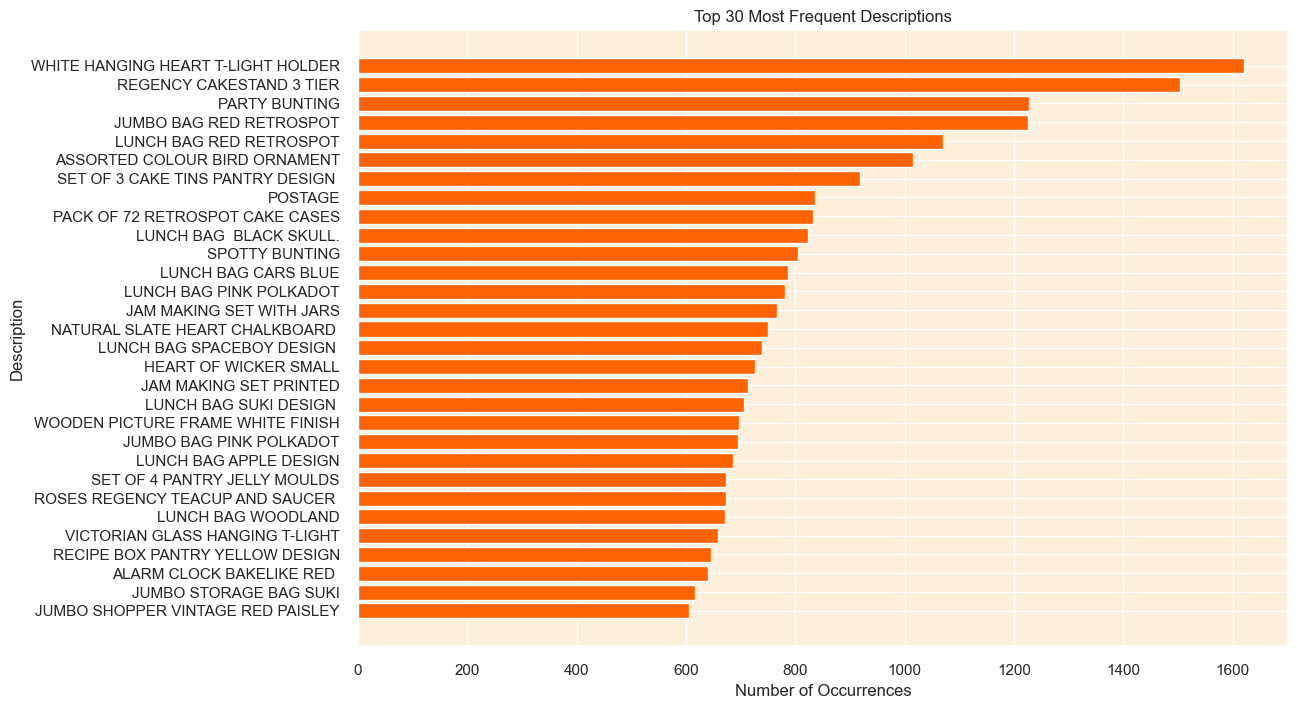

In [29]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()#value-count
# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on Descriptions:</font></h3>

- The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
       
    
- Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [30]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
print(lowercase_descriptions)
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... ' NINE DRAWER OFFICE TIDY'
 'CARD HOLDER LOVE BIRD LARGE ' 'HORSE & PONY WALL ART']
The unique descriptions containing lowercase characters are:
------------------------------------------------------------
Discount
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Manual
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
CRUK Commission


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>
    
- Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "__Next Day Carriage__" and "__High Resolution Image__". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy:</font></h3>

- __Step 1__: Remove the rows where the descriptions contain service-related information like "__Next Day Carriage__" and "__High Resolution Image__", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

    
- __Step 2__: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [31]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")


The percentage of records with service-related descriptions in the dataset is: 0.01%


In [32]:
# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]
# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()
# Getting the number of rows in the dataframe
df.shape[0]

270698

<a id="UnitPrice_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.6 |</span><span style='color:#ff6200'> Treating Zero Unit Prices</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, first I am going to take a look at the statistical description of the `UnitPrice` column:

In [33]:
df['UnitPrice'].describe()

count    270698.000000
mean          3.583702
std          82.194234
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>
    
Write your inferences here : 
1.Data Quality Improvement: Removing records with zero unit prices helps to improve the overall quality of the dataset by eliminating potentially erroneous or incomplete data entries. Zero unit prices could indicate missing or incorrect data, data entry errors, or promotional items that were given away for free.

2.Preservation of Analysis Integrity: By removing records with zero unit prices, you ensure that the analysis or modeling conducted on the dataset is based on accurate and reliable data. Including such records could skew statistical metrics, averages, or predictions, leading to misleading results.

3.Better Reflects Business Reality: In most commercial transactions, it's rare for goods to be sold for a unit price of zero unless they are explicitly marked as free or promotional items. Removing such records aligns the dataset more closely with real-world business scenarios and improves its suitability for analysis or modeling.

4.Mitigation of Outliers: Zero unit prices can be considered outliers in datasets containing sales or pricing information. Removing these outliers helps to mitigate their potential influence on statistical analyses, ensuring that the resulting insights are more representative of typical business operations.

5.Enhancement of Decision Making: By cleaning the dataset to remove records with zero unit prices, decision-makers can have greater confidence in the data-driven insights derived from analyses or models. This can lead to more informed business decisions and strategies based on more accurate and reliable information.


In [34]:
df[df['UnitPrice']==0].describe()['Quantity']

count     23.000000
mean      45.173913
std       69.938058
min        1.000000
25%        1.000000
50%       10.000000
75%       58.000000
max      240.000000
Name: Quantity, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on UnitPrice: </font></h3>

- The transactions with a unit price of zero are relatively few in number (33 transactions).
    
    
- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
    
    
- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [35]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] != 0]

<a id="outlier_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.7 |</span><span style='color:#ff6200'> Outlier Treatment</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers __after the feature engineering phase__ where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.

In [36]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [37]:
# Getting the number of rows in the dataframe
df.shape[0]

270675